In [189]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
AIS_extract_fiji = pd.read_csv('Lautoka AIS data last 12 months.csv', error_bad_lines=False)

b'Skipping line 85349: expected 28 fields, saw 29\nSkipping line 85394: expected 28 fields, saw 29\nSkipping line 85410: expected 28 fields, saw 29\nSkipping line 85898: expected 28 fields, saw 29\nSkipping line 85992: expected 28 fields, saw 29\nSkipping line 86018: expected 28 fields, saw 29\nSkipping line 86022: expected 28 fields, saw 29\nSkipping line 86076: expected 28 fields, saw 29\nSkipping line 86106: expected 28 fields, saw 29\nSkipping line 86120: expected 28 fields, saw 29\nSkipping line 86155: expected 28 fields, saw 29\nSkipping line 86337: expected 28 fields, saw 29\nSkipping line 86375: expected 28 fields, saw 29\nSkipping line 86393: expected 28 fields, saw 29\nSkipping line 86422: expected 28 fields, saw 29\nSkipping line 86433: expected 28 fields, saw 29\nSkipping line 86485: expected 28 fields, saw 29\nSkipping line 86525: expected 28 fields, saw 29\nSkipping line 86708: expected 28 fields, saw 29\nSkipping line 86714: expected 28 fields, saw 29\nSkipping line 8671

In [4]:
AIS_extract_fiji.head()

,dtg,mmsi,vessel_name,callsign,vessel_type_code,vessel_class,length,width,flag_country,flag_code,...,eta,draught,sog,cog,rot,heading,nav_status,nav_status_code,source,message_type
0,2020-03-15T09:22:49.000Z,636016801,HIGH TRUST,D5HW6,80.0,A,183.0,32.0,Liberia,636.0,...,3150800,10.7,0.1,304.1,0.0,17.0,At Anchor,1,S-AIS,3
1,2020-03-15T09:25:49.000Z,636016801,HIGH TRUST,D5HW6,80.0,A,183.0,32.0,Liberia,636.0,...,3150800,10.7,0.1,291.6,0.0,20.0,At Anchor,1,S-AIS,3
2,2020-03-15T09:26:13.000Z,520324000,WICKHAM,3DPC,52.0,A,37.0,11.0,Fiji,520.0,...,3141945,5.3,0.0,0.0,0.0,0.0,Moored,5,S-AIS,3
3,2020-03-15T09:31:08.000Z,356964000,LATITUDE,HP9651,37.0,A,53.0,11.0,Panama,356.0,...,1050600,3.0,0.0,331.0,0.0,0.0,At Anchor,1,S-AIS,27
4,2020-03-15T09:34:08.000Z,356964000,LATITUDE,HP9651,37.0,A,53.0,11.0,Panama,356.0,...,1050600,3.0,0.0,140.0,0.0,0.0,At Anchor,1,S-AIS,27


In [109]:
AIS_extract_fiji_filtered = AIS_extract_fiji[['draught', 
                                          'mmsi', 
                                          'dtg',
                                          'vessel_name',
                                          'vessel_class', 
                                          'vessel_type_main', 
                                          'vessel_type_code',
                                          'message_type', 
                                          'nav_status_code', 
                                          'nav_status', 
                                          'eta',
                                          'destination', 
                                          'vessel_type_sub', 
                                          'flag_country']]

In [ ]:
#explaining each code 
#explain what is filtered out 

In [110]:
AIS_extract_fiji_filtered.count()

draught             3034626
mmsi                3034626
dtg                 3034626
vessel_name         3034626
vessel_class        3034626
vessel_type_main    1210325
vessel_type_code    2969694
message_type        3034626
nav_status_code     3034626
nav_status          3034626
eta                 3034626
destination         2933642
vessel_type_sub      529965
flag_country        3020913
dtype: int64

In [111]:
# check for duplicates 
dupli = AIS_extract_fiji_filtered[AIS_extract_fiji_filtered.duplicated()]
# % of duplicates 
dupli['draught'].count()/AIS_extract_fiji_filtered['draught'].count()

0.0026972022252495036

In [112]:
# remove duplicates 

AIS_extract_fiji_filtered.drop_duplicates(keep = False, inplace = True)

/Users/ethel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
AIS_extract_fiji_filtered.count()

draught             3018302
mmsi                3018302
dtg                 3018302
vessel_name         3018302
vessel_class        3018302
vessel_type_main    1205648
vessel_type_code    2953494
message_type        3018302
nav_status_code     3018302
nav_status          3018302
eta                 3018302
destination         2917346
vessel_type_sub      528804
flag_country        3004591
dtype: int64

In [114]:
# check for nulls 

AIS_extract_fiji_filtered.isnull().sum()

draught                   0
mmsi                      0
dtg                       0
vessel_name               0
vessel_class              0
vessel_type_main    1812654
vessel_type_code      64808
message_type              0
nav_status_code           0
nav_status                0
eta                       0
destination          100956
vessel_type_sub     2489498
flag_country          13711
dtype: int64

In [115]:
#convert date 

AIS_extract_fiji_filtered['dtg'] = pd.to_datetime(AIS_extract_fiji_filtered['dtg']).apply(lambda x: x.date())

/Users/ethel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
#check extract - number of data points per day 

AIS_extract_fiji_filtered['dtg'].value_counts()

2019-12-22    22745
2020-07-17    20080
2020-04-26    18694
2020-06-21    18053
2019-09-21    17916
              ...  
2020-08-16     1401
2020-08-20     1102
2020-08-17      977
2020-08-18      784
2020-08-19      770
Name: dtg, Length: 364, dtype: int64

## filtering 

In [126]:
# navigation status 

# keeping "At Anchor", "Moored"

AIS_extract_fiji_at_port = AIS_extract_fiji_filtered[(AIS_extract_fiji_filtered['nav_status'] == 'At Anchor')| (AIS_extract_fiji_filtered['nav_status'] == 'Moored')]
AIS_extract_fiji_at_port.head()

,draught,mmsi,dtg,vessel_name,vessel_class,vessel_type_main,vessel_type_code,message_type,nav_status_code,nav_status,eta,destination,vessel_type_sub,flag_country
0,10.7,636016801,2020-03-15,HIGH TRUST,A,Oil And Chemical Tanker,80.0,3,1,At Anchor,3150800,VUDA OPL ANCH,Chemical Oil Products Tanker,Liberia
1,10.7,636016801,2020-03-15,HIGH TRUST,A,Oil And Chemical Tanker,80.0,3,1,At Anchor,3150800,VUDA OPL ANCH,Chemical Oil Products Tanker,Liberia
2,5.3,520324000,2020-03-15,WICKHAM,A,NaN,52.0,3,5,Moored,3141945,LAUTOKA,NaN,Fiji
3,3.0,356964000,2020-03-15,LATITUDE,A,NaN,37.0,27,1,At Anchor,1050600,LTK PORT,NaN,Panama
4,3.0,356964000,2020-03-15,LATITUDE,A,NaN,37.0,27,1,At Anchor,1050600,LTK PORT,NaN,Panama


In [127]:
#vessel types 


##divide into trade and tourism 

#removing unrelevant vessel types 

AIS_extract_fiji_at_port = AIS_extract_fiji_at_port[(AIS_extract_fiji_at_port['vessel_type_sub'] != 'Naval Naval Auxiliary') | (pd.notna(AIS_extract_fiji_at_port['vessel_type_sub']))]



AIS_extract_fiji_at_port['vessel_category'] = np.where((AIS_extract_fiji_at_port['vessel_type_sub']== 'Yacht')| (AIS_extract_fiji_at_port['vessel_type_sub']== 'Yacht')| (AIS_extract_fiji_at_port['vessel_type_sub']== 'Sailing Vessel')
                                                       , 'tourism', 'trade')


In [128]:
AIS_extract_fiji_at_port['vessel_category'].groupby(AIS_extract_fiji_at_port['vessel_category']).count()

vessel_category
tourism    159070
trade      792375
Name: vessel_category, dtype: int64

In [129]:
#observation per vessel

AIS_extract_fiji_at_port['vessel_name'].groupby(AIS_extract_fiji_at_port['vessel_name']).count()

vessel_name
994027039         8V        1
ADIX                      901
ALAM SINAR               3077
ALP DEFENDER                1
AMSTERDAM                 206
                        ...  
WELLINGTON STAR             1
WICKHAM                 86788
WICKHAM           !*        1
WORLD SWAN 2             1280
YIN CAI                  1650
Name: vessel_name, Length: 173, dtype: int64

In [134]:
#remove row when dtg is nan 

AIS_extract_fiji_at_port_datediff = AIS_extract_fiji_at_port[AIS_extract_fiji_at_port['dtg'].notnull()]

In [170]:
# convert day to month 



AIS_extract_fiji_at_port['month'] = pd.to_datetime(AIS_extract_fiji_at_port['dtg']).dt.to_period('M') 

In [174]:
# count number of distinct ID per month 


# import (not from Fiji)
AIS_extract_fiji_at_port_agr = AIS_extract_fiji_at_port[AIS_extract_fiji_at_port['flag_country'] != 'Fiji'][['month', 'vessel_name']].groupby('month').nunique()




In [191]:
AIS_extract_fiji_at_port_agr

,count,num_ships
month,,
2019-09,1,48
2019-10,1,44
2019-11,1,39
2019-12,1,31
2020-01,1,58
2020-02,1,41
2020-03,1,30
2020-04,1,30
2020-05,1,25


In [182]:
AIS_extract_fiji_at_port_agr.columns = ['count', 'num_ships']

In [183]:
AIS_extract_fiji_at_port_agr.index

PeriodIndex(['2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09'],
            dtype='period[M]', name='month', freq='M')

In [184]:
#import test Fiji import data 


import_test_fiji = pd.read_csv('test_import.csv')

In [187]:
#clean
#convert  datetime 
import_test_fiji['month'] = pd.to_datetime(import_test_fiji['date']).dt.to_period('M')


#merge 
import_test_fiji_merged = import_test_fiji.merge(AIS_extract_fiji_at_port_agr, left_on = 'month', right_on = 'month')

#correlation
import_test_fiji_merged['value'].astype(float).corr(import_test_fiji_merged['num_ships'].astype(float))


0.11696182379146003

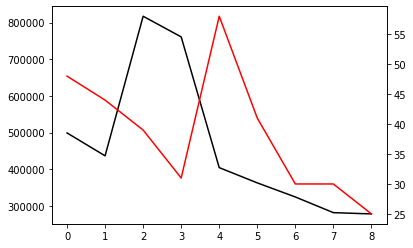

In [190]:
#visualisation 
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(import_test_fiji_merged['value'].astype(float), color='black')
ax_right.plot(import_test_fiji_merged['num_ships'].astype(float), color='red')

## Additional resources 

In [ ]:
"""
name: Name of the vessel (text).
mmsi: Maritime Mobile Service Identity number of the vessel (text).
imo: International Maritime Organization number of the vessel (text).
callsign: Call sign of the vessel (text).
type: Vessel type (text).
loa: Overall length of the vessel (text).
lat: Latitude coordinate (decimal degrees) of the vessel’s position (text).
lon: Longitude coordinate (decimal degrees) of the vessel’s position (text).
sog: Vessel’s speed over ground (text).
cog: Vessel’s course over ground (text).
hdg: Vessel’s heading (text).
epoch: The seconds field of the UTC time when the data were generated (text).

"""